**3) Normalize features (standardization)**

In [ ]:
import pandas as pd
data = pd.read_csv("diabetes.csv", dtype=float)   # force numeric
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)


In [ ]:
import numpy as np
X = (X - X.mean(axis=0)) / X.std(axis=0)


4) Train / test **split**

In [ ]:
np.random.seed(1)
idx = np.random.permutation(len(X))
train_idx = idx[:600]    # use first 600 as train (example)
test_idx  = idx[600:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


5) Initialize network architecture & **parameters**

In [ ]:
input_dim = X_train.shape[1]   # number of features (e.g. 8)
hidden_dim = 8                 # number of neurons in hidden layer
output_dim = 1                 # binary output
lr = 0.01                      # learning rate

# weights (small random) and biases (zeros)
W1 = np.random.randn(input_dim, hidden_dim) * 0.1
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.1
b2 = np.zeros((1, output_dim))


6) Define activation and derivative (sigmoid)**bold text**

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)   # expects sigmoid(x) as input


7) Training loop (forward, loss, backprop, update)**bold text**

In [ ]:
epochs = 3000
for epoch in range(epochs):
    # ---- forward pass ----
    z1 = X_train.dot(W1) + b1        # pre-activation of hidden
    a1 = sigmoid(z1)                 # activation of hidden
    z2 = a1.dot(W2) + b2             # pre-activation of output
    y_pred = sigmoid(z2)             # network output (probabilities)

    # ---- compute loss (MSE here, simple) ----
    loss = np.mean((y_train - y_pred) ** 2)

    # ---- backpropagation (compute gradients) ----
    d_y = (y_pred - y_train) * sigmoid_deriv(y_pred)  # delta at output
    d_W2 = a1.T.dot(d_y)
    d_b2 = np.sum(d_y, axis=0, keepdims=True)

    d_a1 = d_y.dot(W2.T)
    d_z1 = d_a1 * sigmoid_deriv(a1)
    d_W1 = X_train.T.dot(d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # ---- update weights (gradient descent) ----
    W2 -= lr * d_W2
    b2 -= lr * d_b2
    W1 -= lr * d_W1
    b1 -= lr * d_b1

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | Loss = {loss:.4f}")


Epoch 0 | Loss = 0.2634
Epoch 500 | Loss = 0.1408
Epoch 1000 | Loss = 0.1360
Epoch 1500 | Loss = 0.1289
Epoch 2000 | Loss = 0.1197
Epoch 2500 | Loss = 0.1132


8) Prediction **function**

In [ ]:
def predict(x):
    a1 = sigmoid(x.dot(W1) + b1)
    y_out = sigmoid(a1.dot(W2) + b2)
    return (y_out > 0.5).astype(int)


**9) Evaluate on test set**

In [ ]:
y_pred_test = predict(X_test)
acc = np.mean(y_pred_test == y_test)
print("Test Accuracy:", acc)


Test Accuracy: 0.7083333333333334


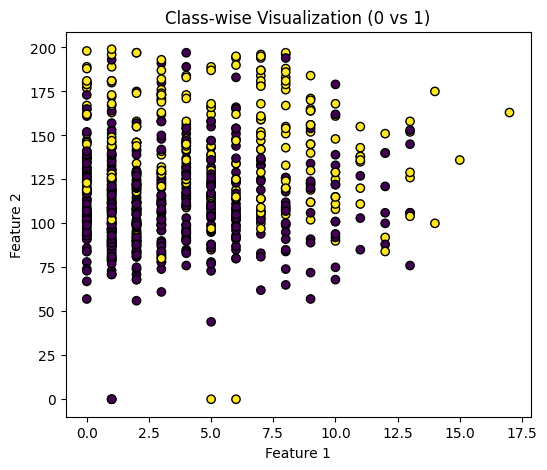

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")

x = df.iloc[:,0]
y = df.iloc[:,1]
c = df.iloc[:,-1]

plt.figure(figsize=(6,5))
plt.scatter(x, y, c=c, edgecolor='k')
plt.title("Class-wise Visualization (0 vs 1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


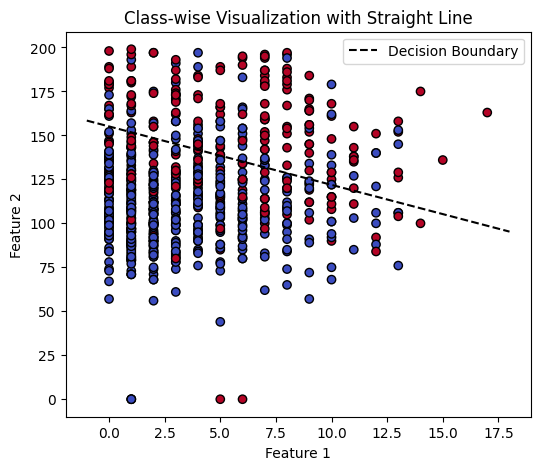

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load data
df = pd.read_csv("diabetes.csv")

# Take first two features for visualization
X = df.iloc[:, :2].values   # Features 0 and 1
y = df.iloc[:, -1].values   # Class labels

# Train a simple logistic regression (linear classifier)
model = LogisticRegression()
model.fit(X, y)

# Create a mesh to plot decision boundary
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx = np.linspace(x_min, x_max, 100)
yy = (-model.intercept_[0] - model.coef_[0][0] * xx) / model.coef_[0][1]  # Line equation

# Plot points
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolor='k')
# Plot decision boundary
plt.plot(xx, yy, 'k--', label='Decision Boundary')
plt.title("Class-wise Visualization with Straight Line")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
